## colab matplotlib 한글 설정

In [ ]:
## Linux 계열
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 19 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (10.7 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120874 files and direc

In [11]:
import numpy as np
import pandas as pd
import os

# import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='NanumBarunGothic')
plt.rc('axes', unicode_minus = False)
# plt.rcParams['axes.unicode_minus'] = False

# plt.style.use('seaborn-v0_8-whitegrid')
# sns.set_context("notebook")
sns.reset_defaults()


In [61]:
## Runtime Configuration Parameters: rcParams
# https://github.com/mwaskom/seaborn/blob/master/seaborn/rcmod.py

sns.set_context('notebook', # paper, notebook, talk, poster
                rc={'font.size':15,
                    'xtick.labelsize':10,
                    'ytick.labelsize':10,
                    'axes.labelsize':15})

# import matplotlib

# Artists = set()
# for key in matplotlib.rcParams.items():
#     # if "." in key:
#     #     Artists.add(key.split(".")[0])
#     print(key)


## seaborn 사용하기

### sns.barplot : Show point estimates and errors as rectangular bars.

In [6]:
## Penguin 데이터 불러오기
penguins = sns.load_dataset("penguins")

# penguins.dropna(axis = 0, how = 'any', inplace=True)

print(penguins.head())
print(penguins.info())

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_

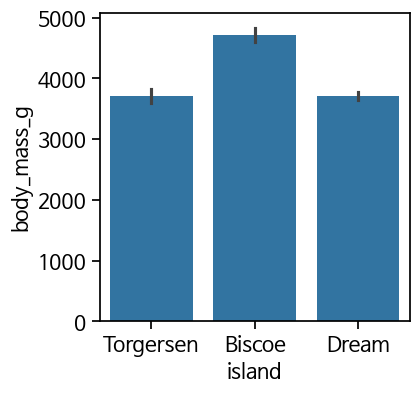

In [7]:
##
fig, axs = plt.subplots(figsize = (4, 4))
sns.barplot(penguins, x="island", y="body_mass_g")
plt.show()

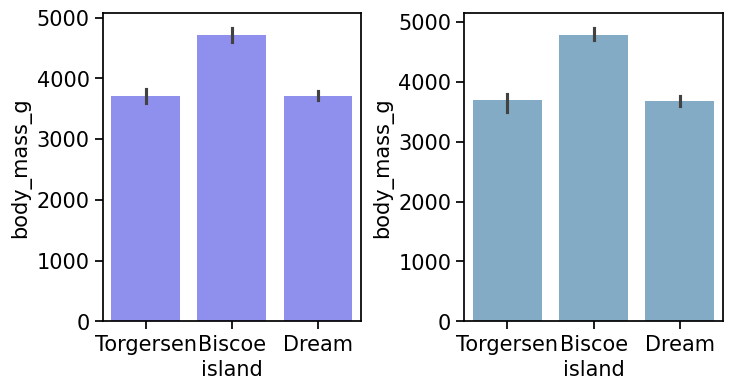

In [17]:
## estimator = 'mean'/'median'

fig, axs = plt.subplots(1, 2, figsize = (8, 4))

sns.barplot(penguins, x="island", y="body_mass_g", estimator='mean', color = 'b', ax = axs[0], alpha = 0.5)
sns.barplot(penguins, x="island", y="body_mass_g", estimator='median', ax = axs[1], alpha = 0.6)

plt.subplots_adjust(wspace = 0.4)

plt.show()

['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


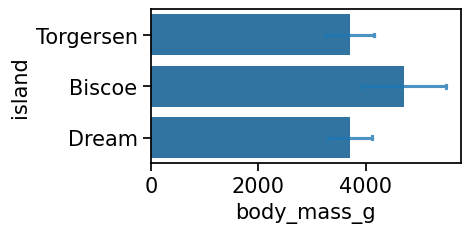

In [39]:
# Confidence interval: errorbar=('ci', 95)/'sd'
# print(sns.color_palette().as_hex())

fig, axs = plt.subplots(figsize = (4, 2))
ax = sns.barplot(penguins, x = "body_mass_g", y = "island", errorbar = 'sd',
                 capsize = 0.05, 
                 err_kws={"color": "#1f77b4", "alpha": 0.8})

# patches = ax.patches
# lines_per_err = 3

# for i, line in enumerate(ax.get_lines()):
#     newcolor = patches[i // lines_per_err].get_facecolor()
#     line.set_color(newcolor)
#     line.set_alpha(0.8)

plt.show()

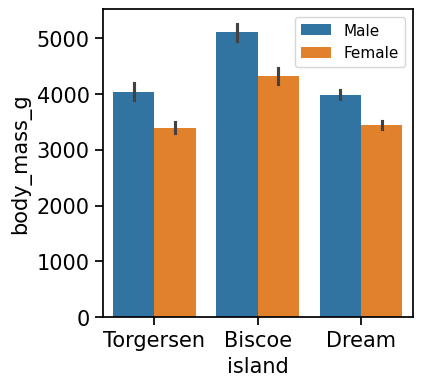

In [43]:
## Groupby: hue
fig, axs = plt.subplots(figsize = (4, 4))

sns.barplot(penguins, x="island", y="body_mass_g", hue="sex")
# axs.grid(True)
plt.legend(loc = 1)
plt.show()

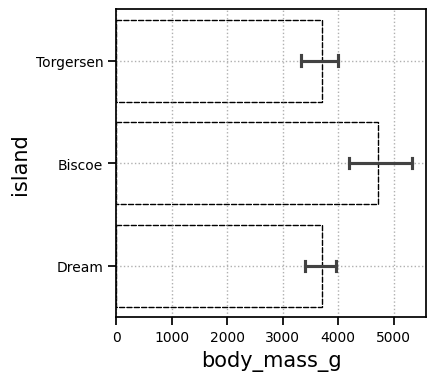

In [64]:
## err_kws로 파라메터 수정

fig, axs = plt.subplots(figsize = (4, 4))
kwargs = {"facecolor": (0, 0, 0, 0),
          'ec': 'k',
          'capstyle':'round',
          'linestyle': '--'}

sns.barplot(
    penguins, x="body_mass_g", y="island",
    errorbar=("pi", 50), capsize=.1,
    **kwargs
)
plt.grid(linestyle = ":")
plt.show()

In [65]:
flights = sns.load_dataset('flights')
print("flights.head(): \n", flights.head())
print()

flights_wide = flights.pivot(index = 'year', columns='month', values='passengers')
# print("flights_wide: \n", flights_wide)
flights_wide

flights.head(): 
    year month  passengers
0  1949   Jan         112
1  1949   Feb         118
2  1949   Mar         132
3  1949   Apr         129
4  1949   May         121



month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


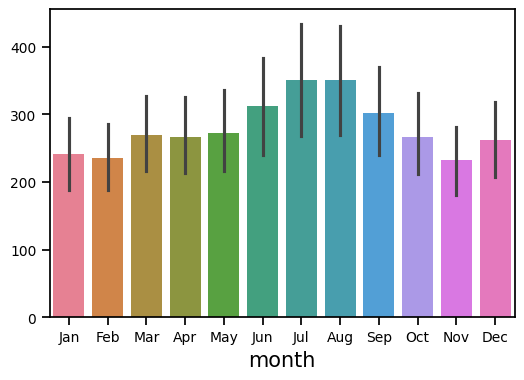

In [66]:
## plotting a “wide-form” dataframe, each column will be aggregated and represented as a bar:

fig, axs = plt.subplots(figsize = (6, 4))

sns.barplot(flights_wide)

plt.show()

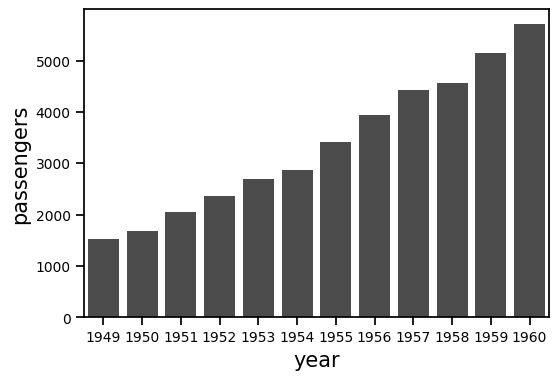

In [67]:
## Use a different aggregation function and disable the error bars:

fig, axs = plt.subplots(figsize = (6, 4))

sns.barplot(flights, x="year", y="passengers", estimator="sum", errorbar=None,
            color = 'k', alpha = 0.7)

plt.show()

[Text(0, 0, '1520'),
 Text(0, 0, '1676'),
 Text(0, 0, '2042'),
 Text(0, 0, '2364'),
 Text(0, 0, '2700'),
 Text(0, 0, '2867'),
 Text(0, 0, '3408'),
 Text(0, 0, '3939'),
 Text(0, 0, '4421'),
 Text(0, 0, '4572'),
 Text(0, 0, '5140'),
 Text(0, 0, '5714')]

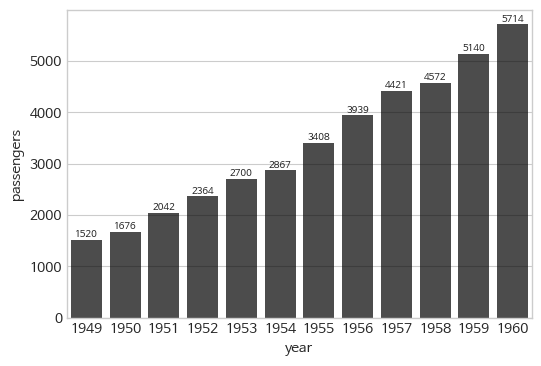

In [ ]:
## Add text labels with each bar’s value
fig, axs = plt.subplots(figsize = (6, 4))

ax = sns.barplot(flights, x="year", y="passengers",
                 estimator="sum", errorbar=None, color = 'k', alpha = 0.7)

ax.bar_label(ax.containers[0], fontsize=7)

# ax.get_xticklabels()
# ax.plot(5, 3600, "*", markersize=10, color="r")

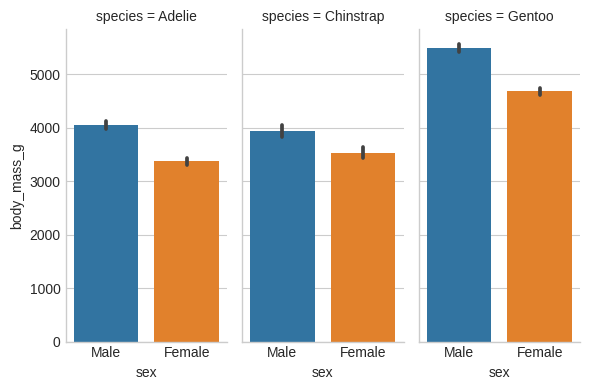

In [ ]:
# Use catplot() to draw faceted bars, which is recommended over working directly with FacetGrid
# seaborn.axisgrid.FacetGrid

sns.catplot(
    penguins, kind="bar",
    x="sex", y="body_mass_g", col="species",
    height=4, aspect=.5,
)

plt.show()

### sns.countplot : Show the counts of observations in each categorical bin using bars.

In [ ]:
titanic = sns.load_dataset('titanic')
print(titanic.head())
print(titanic.info())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-nu

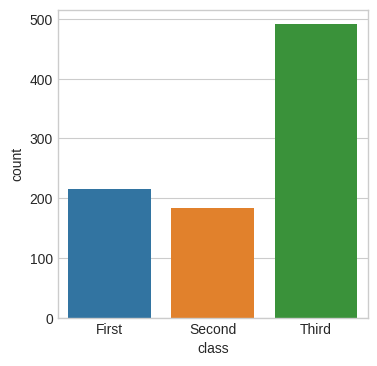

In [ ]:
## Show the count of value for a single categorical variable

## using sns.barplot
# count_val = titanic['class'].value_counts()
# count_val = count_val.reset_index(drop = False)
# sns.barplot(x ='index', y = 'class', data = count_val)
fig, axs = plt.subplots(figsize = (4,4))

sns.countplot(titanic, x="class")

plt.show()

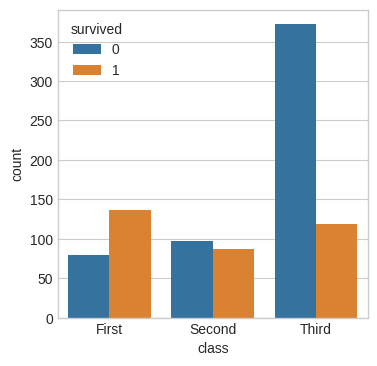

In [ ]:
## Group by a second variable

fig, axs = plt.subplots(figsize = (4,4))

sns.countplot(titanic, x="class", hue="survived")

plt.show()

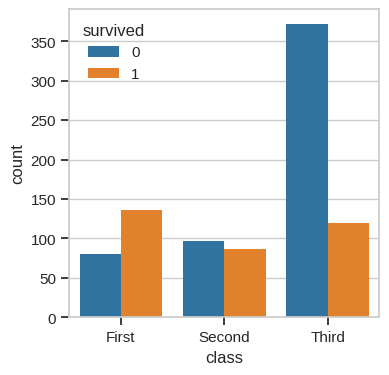

In [ ]:
## Normalize the counts to show percentages:

fig, axs = plt.subplots(figsize = (4,4))

sns.countplot(titanic, x="class", hue="survived")
# sns.countplot(titanic, x="class", hue="survived", stat="percent")


plt.show()

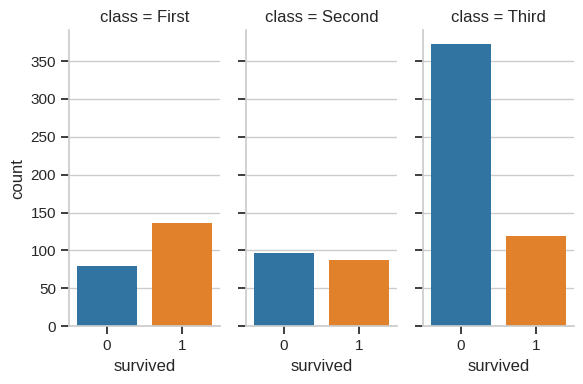

In [ ]:
# Use catplot() to draw faceted counts, which is recommended over working directly with FacetGrid
# seaborn.axisgrid.FacetGrid

sns.catplot(
    titanic, kind="count",
    x= "survived", col="class",
    height=4, aspect=.5,
)

plt.show()

### sns.hist: Plot univariate or bivariate histograms to show distributions of datasets.

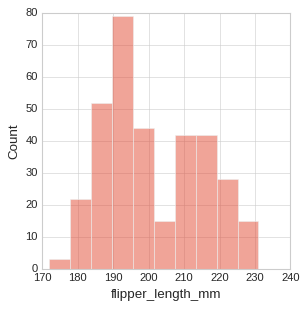

In [ ]:
fig, axs = plt.subplots(figsize = (4,4))
# kwagrs = {'ec': "w"}

plt.style.use("seaborn-v0_8-whitegrid")
sns.histplot(data=penguins, x="flipper_length_mm", alpha = 0.5)

plt.show()

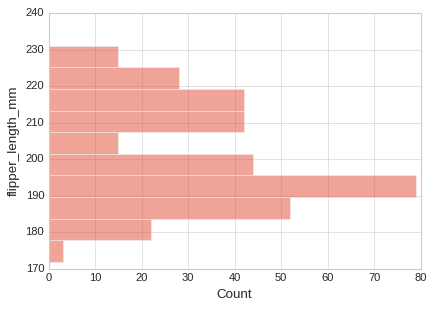

In [ ]:
## Flip the plot by assigning the data variable to the y axis

fig, axs = plt.subplots(figsize = (6,4))

sns.histplot(data=penguins, y ="flipper_length_mm", alpha = 0.5)

plt.show()

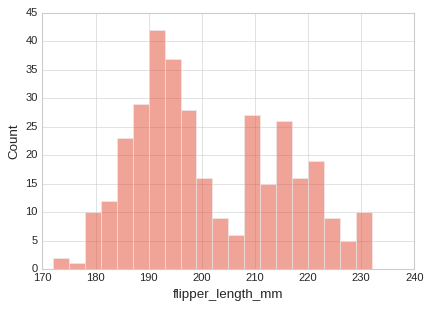

In [ ]:
## Check how well the histogram represents the data by specifying a different bin width and bins numbers

fig, axs = plt.subplots(figsize = (6,4))

sns.histplot(data=penguins, x ="flipper_length_mm", alpha = 0.5,
             binwidth=3,
            #  bins=30
             )

plt.show()

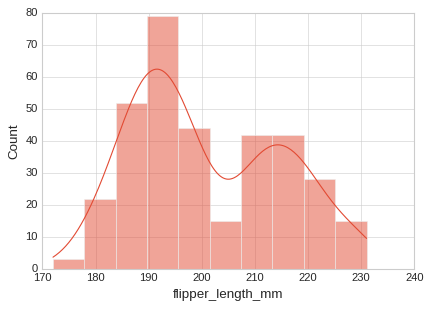

In [ ]:
## Add a kernel density estimate to smooth the histogram

fig, axs = plt.subplots(figsize = (6,4))

sns.histplot(data=penguins, x ="flipper_length_mm", alpha = 0.5,
            kde=True )

plt.show()

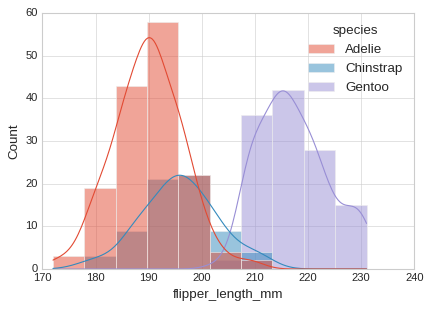

In [ ]:
## draw multiple histograms from a long-form dataset with hue mapping

fig, axs = plt.subplots(figsize = (6,4))

sns.histplot(data=penguins, x ="flipper_length_mm", alpha = 0.5,
            kde=True, hue="species" )

plt.show()

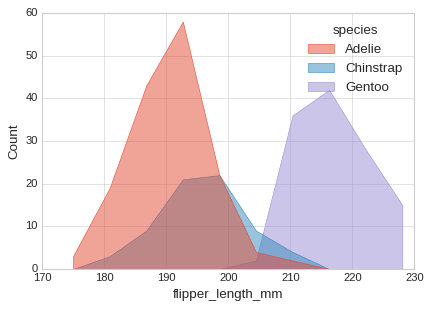

In [ ]:
## A different approach would be to draw a function
## "bars", "step", "poly"

fig, axs = plt.subplots(figsize = (6,4))

sns.histplot(data=penguins, x ="flipper_length_mm", alpha = 0.5,
            hue="species", element="poly" )

plt.show()

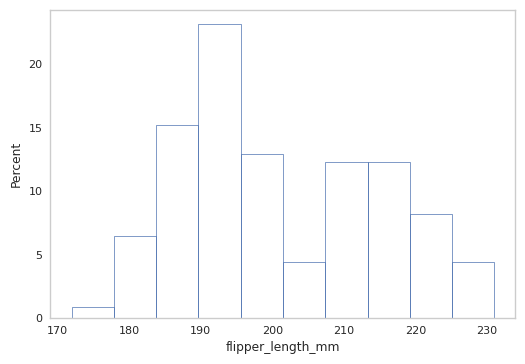

In [ ]:
## Normalize so that each bar’s height shows a probability, proportion, or percent, density
sns.set_style("whitegrid", {'axes.grid' : False})
fig, axs = plt.subplots(figsize = (6,4))

sns.histplot(data=penguins, x ="flipper_length_mm",
              stat="percent", fill = False) # default = count

plt.show()

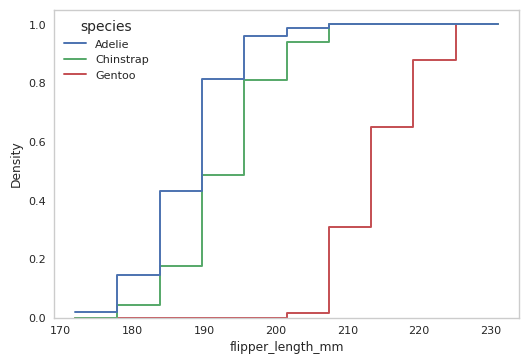

In [ ]:
## Step functions, esepcially when unfilled, make it easy to compare cumulative histograms
sns.set_style("whitegrid", {'axes.grid' : False})

fig, axs = plt.subplots(figsize = (6,4))

ax = sns.histplot(
    data=penguins, x="flipper_length_mm", hue="species",
    # hue_order=["Radial Velocity", "Transit"],
    element="step", fill=False,
    cumulative=True, stat="density", common_norm=False,
)


plt.show()


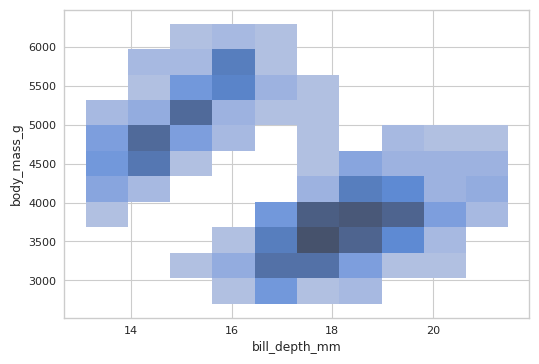

In [ ]:
## a bivariate histogram is computed and shown as a heatmap
sns.set_style("whitegrid", {'axes.grid' : True})
fig, axs = plt.subplots(figsize = (6,4))

sns.histplot(penguins, x="bill_depth_mm", y="body_mass_g")

plt.show()

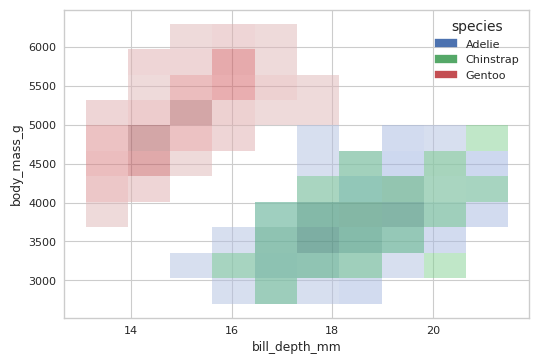

In [ ]:
fig, axs = plt.subplots(figsize = (6,4))

sns.histplot(penguins, x="bill_depth_mm", y="body_mass_g", hue = "species",
             alpha = 0.5)

plt.show()